In [1]:
%load_ext autoreload
%autoreload 2
from helper import *
%config InlineBackend.figure_format='retina'

In [2]:
alldata = abcd_data()
alldata_1 = get_data_with_followups(alldata, followups = '1y_follow_up')
followup1year = abcd_data(measurement = '1y_follow_up', load = False, df = alldata_1)
followup1year_1 = prepare_data(followup1year)
item_list_fu = filter_polychoric_corr(followup1year_1, print_corr = True)

cbcl_q08_p with cbcl_q10_p


Can't concentrate, can't pay attention for long with 
Can't sit still, restless, or hyperactive


cbcl_q08_p with cbcl_q78_p


Can't concentrate, can't pay attention for long with 
Inattentive or easily distracted 


cbcl_q18_p with cbcl_q91_p


Deliberately harms self or attempts suicide with 
Talks about killing self


cbcl_q20_p with cbcl_q21_p


Destroys their own things with 
Destroys things belonging to their family or others


cbcl_q22_p with cbcl_q28_p


Disobedient at home  with 
Breaks rules at home, school or elsewhere 


cbcl_q23_p with cbcl_q28_p


Disobedient at school with 
Breaks rules at home, school or elsewhere 


cbcl_q25_p with cbcl_q48_p


Doesn't get along with other kids with 
Not liked by other kids


cbcl_q38_p with cbcl_q48_p


Gets teased a lot with 
Not liked by other kids


cbcl_q40_p with cbcl_q70_p


Hears sound or voices that aren't there with 
Sees things that aren't there


cbcl_q53_p with cbcl_q55_p


Overeating with 
Ove

### Create Aggregates
An aggregate dictionary is created by assessing the highly correlated items (polychoric correlation > .75) and semantically clustering them. This is a manual process as it requires inspection. Then the prepared baseline data and its polchorical correlation matrix are obtained for further analysis.

In [3]:
aggregates_followup1year = {"cbcl_q8182_Steals": ['cbcl_q81_p', 'cbcl_q82_p'], 
                  "cbcl_q165797_Attacks/Threatens": ['cbcl_q57_p', 'cbcl_q97_p'],
                  "cbcl_q56cf_Stomach_Issues":['cbcl_q56c_p', 'cbcl_q56f_p'],
                  "cbcl_q5355_Weight_Problems":['cbcl_q53_p', 'cbcl_q55_p'],
                  "cbcl_q4070_Hallucinations": ['cbcl_q70_p', 'cbcl_q40_p'],
                  "cbcl_q253848_Peer_Problems": ['cbcl_q25_p', 'cbcl_q48_p', 'cbcl_q38_p'],
                  "cbcl_q222328_Disobeys_Rules": ['cbcl_q28_p', 'cbcl_q23_p', 'cbcl_q22_p'],
                  "cbcl_q21106_Destroys": ['cbcl_q20_p', 'cbcl_q106_p', 'cbcl_q21_p'],
                  "cbcl_q081078_Distracted/Hyperactive": ['cbcl_q10_p', 'cbcl_q78_p', 'cbcl_q08_p'],
                  "cbcl_q5960_SexPlay": ['cbcl_q59_p', 'cbcl_q60_p'],
                  "cbcl_q8485_Strangeness": ['cbcl_q84_p', 'cbcl_q85_p']}


followup1year_data = aggregate_items(followup1year_1, item_list_fu, aggregates_followup1year)
data_poly_corr_fu = common.polychoric.polychoric_correlation_serial(get_question_items(followup1year_data, 'cbcl_q').to_numpy().T,0,3)


# Exploratory Factor Analysis

Initially, the EFA is run with 101 factors and without rotation to obtain the number of factors to extract. Key parameters are inspected and plotted.

In [4]:
EFA_df = get_question_items(followup1year_data, 'cbcl_q')

adequacy_test(EFA_df, data_poly_corr_fu)

The data is suitable for an EFA. Sphericity test was significant with a p-value of 0.0.


The data is suitable for an EFA. KMO test resulted in a value of 0.9904356246255095.




/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [5]:
# fit factor analysis 
efa = FactorAnalyzer(n_factors = 101, rotation = None, is_corr_matrix=False , method = 'principal')
efa.fit(EFA_df)


FactorAnalyzer(method='principal', n_factors=101, rotation=None,
               rotation_kwargs={})

Communalities are inspected, these are all 1 when using 'principal' as the extraction method as PAF makes the assumption that there is no unique variance.

In [10]:
efa.get_communalities()  

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
pd.DataFrame(efa.get_factor_variance())

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,16.715784,3.754624,2.341521,2.140476,1.931818,1.765486,1.522607,1.509046,1.372967,1.316187,...,0.456279,0.452385,0.445491,0.431387,0.425612,0.414278,0.401189,0.381567,0.369107,0.352263
1,0.170569,0.038312,0.023893,0.021842,0.019712,0.018015,0.015537,0.015398,0.014010,0.013430,...,0.004656,0.004616,0.004546,0.004402,0.004343,0.004227,0.004094,0.003894,0.003766,0.003595
2,0.170569,0.208882,0.232775,0.254616,0.274329,0.292344,0.307881,0.323279,0.337289,0.350720,...,0.962518,0.967134,0.971680,0.976081,0.980424,0.984652,0.988746,0.992639,0.996405,1.000000


When looking at the unrotated loading's matrix, it becomes evident that most items load on the first factor.

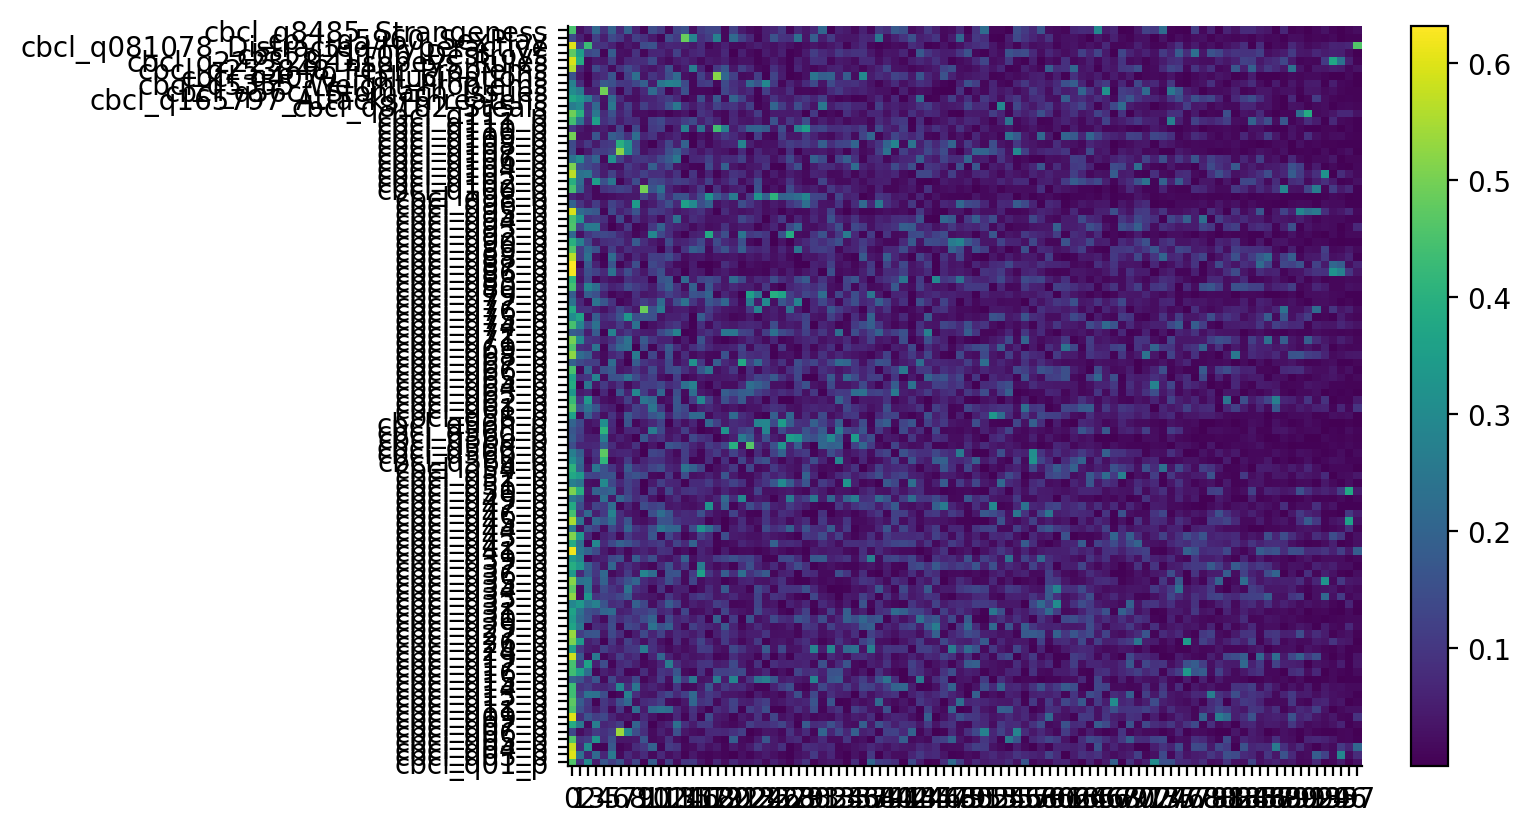

In [12]:
loadings_df = pd.DataFrame(efa.loadings_, index = EFA_df.columns)
plot_diagrams(loadings_df, diagram = "Matrix")

Eigenvalues are inspected to determine the number of factors to extract. According to the Kaiser criterion eigenvalues above 1 (for standardized data) or above the mean of the eigenvalues (for unstandardized data) should be extracted.

In [6]:
ev, v = efa.get_eigenvalues()
above_1 = np.unique((ev > 1), return_counts=True)[1][1] # 22 above 1, mean = 1
above_mean = sum(ev > ev.mean())
print(f"Inspection of the eigenvalues suggest that {above_mean} factors should be extracted.")
pd.DataFrame(efa.get_eigenvalues())


Inspection of the eigenvalues suggest that 22 factors should be extracted.


,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,16.715784,3.754624,2.341521,2.140476,1.931818,1.765486,1.522607,1.509046,1.372967,1.316187,...,0.456279,0.452385,0.445491,0.431387,0.425612,0.414278,0.401189,0.381567,0.369107,0.352263
1,16.715784,3.754624,2.341521,2.140476,1.931818,1.765486,1.522607,1.509046,1.372967,1.316187,...,0.456279,0.452385,0.445491,0.431387,0.425612,0.414278,0.401189,0.381567,0.369107,0.352263


### Scree Plot 
A Scree Plot is used as another cumulative evidence for how many factors to extract. When using the zooming tool, it can be observed that the curve flattens in the area of 6 factors (before there are 'elbows' in which the curve has kinks). 

In [7]:
from bokeh.models import Span
scree = plots.scree_plot(ev, plot_difference= False)
hline = Span(location=1, dimension='width', line_width=1)
scree.renderers.extend([hline])
scree.xaxis.axis_label = 'Factor'
scree.yaxis.axis_label = 'Eigenvalue'
show(scree)


### Running the factor analysis with 22 Factors
To not underestimate the number of factors, we initially run the factor analysis with 22 factors as suggested by the eigenvalues. The factors are rotated and inspected for their loadings.

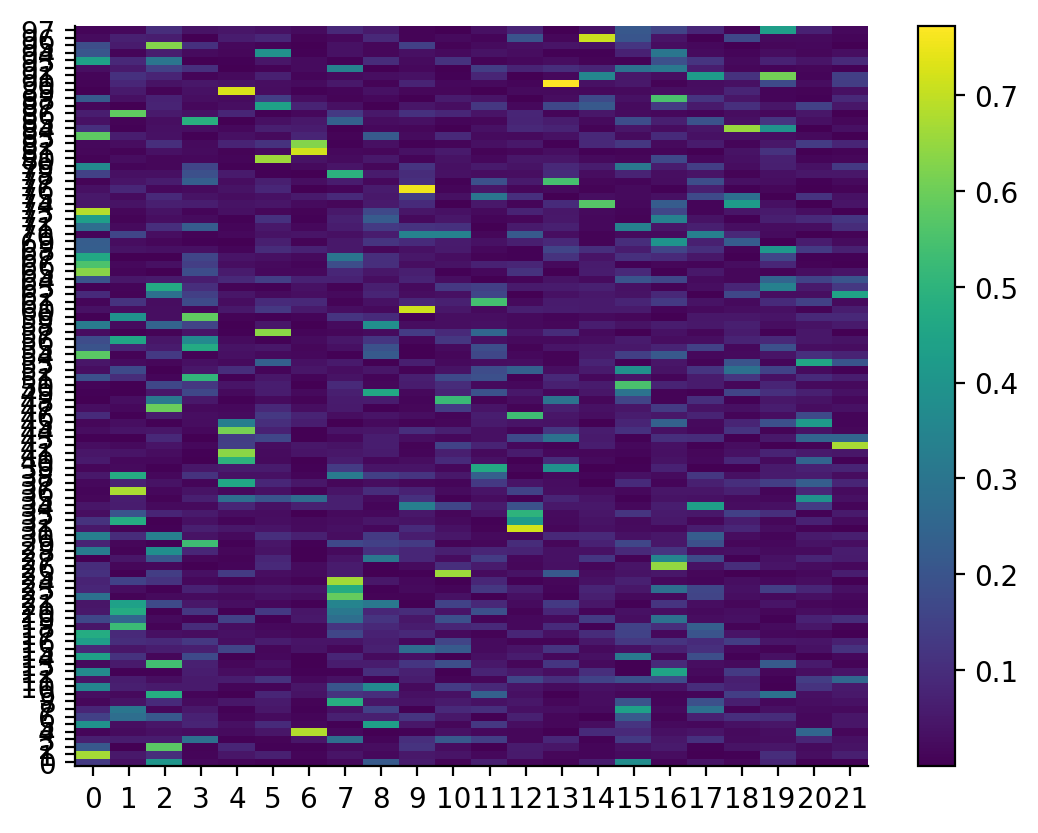

In [15]:
efa_22F = FactorAnalyzer(n_factors = 22, rotation ='geomin_obl', is_corr_matrix=False, method = 'principal')
efa_22F.fit(EFA_df)
rotated_loadings_22F = pd.DataFrame(efa_22F.loadings_).abs()
plot_diagrams(rotated_loadings_22F, "Matrix")

The loadings of the extracted factors are inspected and only factors with primary loadings are kept (criterion: 4+ loadings > .3 that do not have crossloadings with other factors <.1).

In [16]:
rotated_loadings_22F.set_index(EFA_df.columns, inplace = True)
get_primary_loadings(rotated_loadings_22F)

,0,1,2,3,4,7,16,19
cbcl_q56d_p,0.028788,0.018683,0.042231,0.016460,0.144148,0.037270,0.036205,0.001960
cbcl_q79_p,0.092001,0.006426,0.283457,0.143706,0.042424,0.018966,0.085539,0.028265
cbcl_q15_p,0.041209,0.059184,0.028839,0.053671,0.059027,0.033680,0.176622,0.004323
cbcl_q56e_p,0.003543,0.000139,0.086759,0.002513,0.138431,0.016516,0.100166,0.048515
cbcl_q67_p,0.044395,0.021246,0.015023,0.030422,0.018990,0.053506,0.042728,0.009757
...,...,...,...,...,...,...,...,...
cbcl_q112_p,0.062878,0.584570,0.053091,0.034937,0.080312,0.129212,0.017314,0.017335
cbcl_q87_p,0.553530,0.015232,0.032995,0.140038,0.027224,0.180769,0.012984,0.084364
cbcl_q27_p,0.474788,0.089823,0.030806,0.025114,0.034445,0.161983,0.017158,0.015785
cbcl_q95_p,0.686853,0.014572,0.038140,0.010175,0.031209,0.049800,0.160990,0.052060


Since only 8 factors show clear factor loadings, the EFA is run again with 8 factors. 

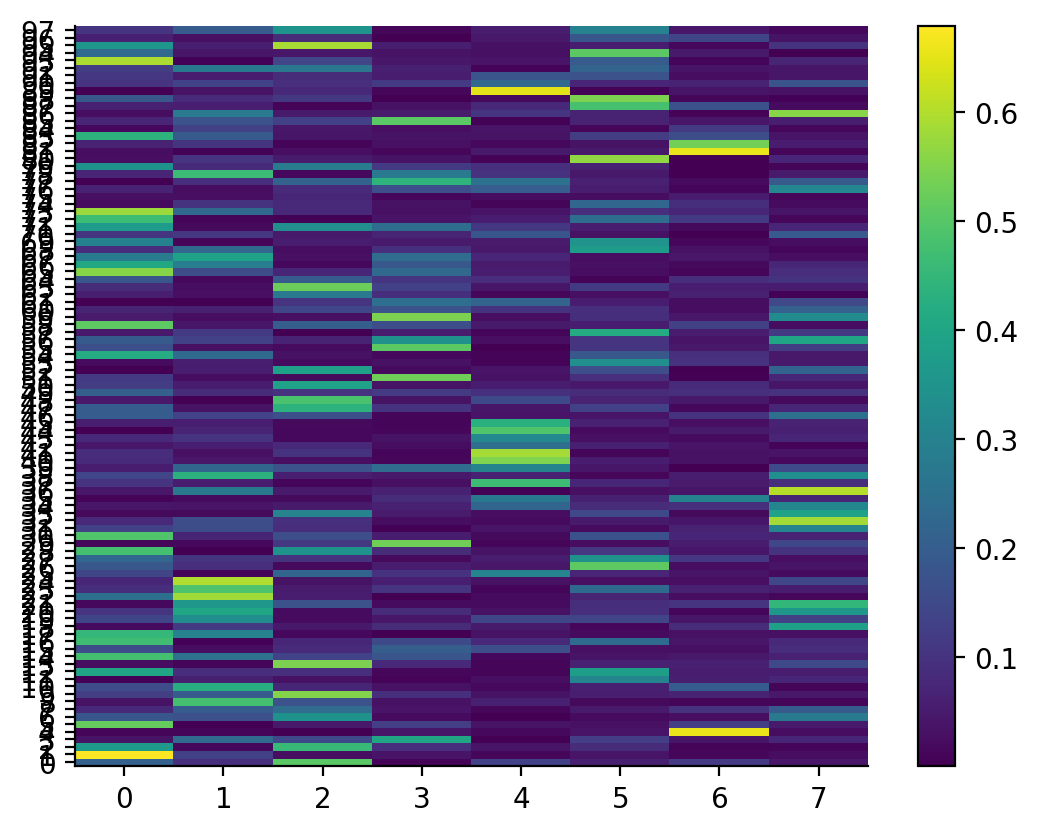

In [17]:
efa_8F = FactorAnalyzer(n_factors = 8, rotation ='geomin_obl', is_corr_matrix=False, method = 'principal')
efa_8F.fit(EFA_df)
rotated_loadings_8F = pd.DataFrame(efa_8F.loadings_).abs()
plot_diagrams(rotated_loadings_8F, "Matrix")


The loadings of the extracted factors are inspected and only factors with primary loadings are kept (criterion: 4+ loadings > .3 that do not have crossloadings with other factors <.1).

In [18]:
rotated_loadings_8F.set_index(EFA_df.columns, inplace = True)
get_primary_loadings(rotated_loadings_8F)

,0,1,2,3,4,5,7
cbcl_q50_p,0.041048,0.274766,0.046499,0.062625,0.003066,0.027457,0.603790
cbcl_q45_p,0.077970,0.157940,0.093261,0.022772,0.019354,0.047442,0.583622
cbcl_q112_p,0.023261,0.278231,0.045872,0.048822,0.104098,0.066022,0.559426
cbcl_q32_p,0.013491,0.362813,0.171767,0.020038,0.021183,0.088037,0.447561
cbcl_q71_p,0.189246,0.128737,0.066159,0.340704,0.024367,0.102071,0.402000
...,...,...,...,...,...,...,...
cbcl_q04_p,0.365041,0.015484,0.458831,0.090468,0.035365,0.082406,0.008377
cbcl_q56d_p,0.040785,0.056757,0.076107,0.023205,0.246148,0.060758,0.007847
cbcl_q79_p,0.056731,0.027446,0.278472,0.089970,0.013080,0.026669,0.004018
cbcl_q165797_Attacks/Threatens,0.183381,0.082054,0.110982,0.001000,0.017130,0.545674,0.002873


Since only 7 factors show clear factor loadings, the EFA is run again with 7 factors. 

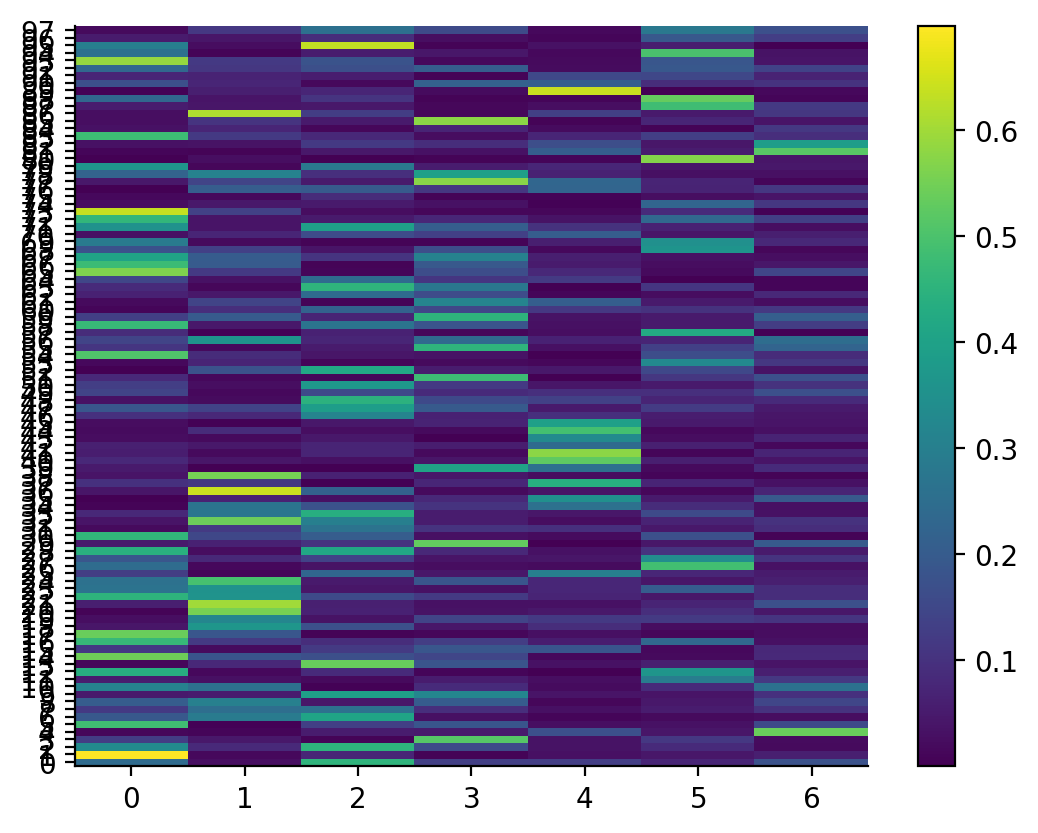

In [19]:
efa_7F = FactorAnalyzer(n_factors = 7, rotation ='geomin_obl', is_corr_matrix=False, method = 'principal')
efa_7F.fit(EFA_df)
rotated_loadings_7F = pd.DataFrame(efa_7F.loadings_).abs()
plot_diagrams(rotated_loadings_7F, "Matrix")

The loadings of the extracted factors are inspected and only factors with primary loadings are kept (criterion: 4+ loadings > .3 that do not have crossloadings with other factors <.1).

In [20]:
rotated_loadings_7F.set_index(EFA_df.columns, inplace = True)
get_primary_loadings(rotated_loadings_7F)

,0,1,2,3,4,5
cbcl_q06_p,0.013535,0.010418,0.053698,0.047840,0.169972,0.039656
cbcl_q107_p,0.009035,0.005928,0.043964,0.032159,0.204520,0.053999
cbcl_q108_p,0.032749,0.033624,0.115520,0.088698,0.164029,0.041029
cbcl_q14_p,0.309886,0.257587,0.003188,0.082731,0.021570,0.082573
cbcl_q71_p,0.141539,0.360321,0.073467,0.237751,0.063674,0.068766
...,...,...,...,...,...,...
cbcl_q43_p,0.459641,0.149508,0.202164,0.027949,0.019788,0.169447
cbcl_q52_p,0.037530,0.553282,0.063965,0.041529,0.023516,0.008743
cbcl_q95_p,0.635350,0.135622,0.022285,0.012052,0.011310,0.082014
cbcl_q72_p,0.085100,0.004182,0.063014,0.013491,0.025783,0.423272


Since only 6 factors show clear factor loadings, the EFA is run again with 6 factors. 

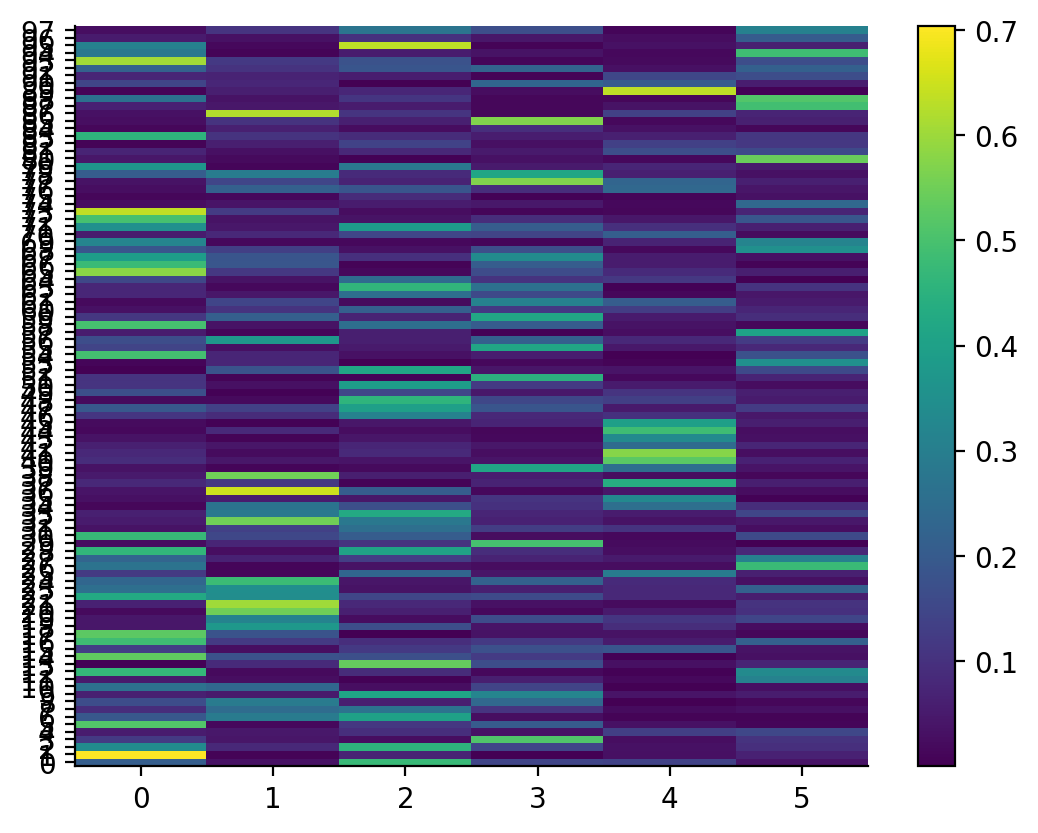

In [21]:
efa_6F = FactorAnalyzer(n_factors = 6, rotation ='geomin_obl', is_corr_matrix=False, method = 'principal')
efa_6F.fit(EFA_df)
rotated_loadings_6F = pd.DataFrame(efa_6F.loadings_).abs()
plot_diagrams(rotated_loadings_6F, "Matrix")

In [22]:
rotated_loadings_6F.set_index(EFA_df.columns, inplace = True)
get_primary_loadings(rotated_loadings_6F)

,0,1,2,3,4,5
cbcl_q106_p,0.041597,0.018161,0.003954,0.030936,0.015566,0.542668
cbcl_q165797_Attacks/Threatens,0.262831,0.033916,0.108060,0.011847,0.013573,0.511441
cbcl_q8182_Steals,0.065832,0.041555,0.053932,0.012925,0.034012,0.491077
cbcl_q21106_Destroys,0.282769,0.007835,0.055176,0.034690,0.014737,0.486320
cbcl_q37_p,0.268173,0.010848,0.035368,0.024964,0.023428,0.475650
...,...,...,...,...,...,...
cbcl_q87_p,0.475704,0.189492,0.007809,0.204205,0.053972,0.006242
cbcl_q56cf_Stomach_Issues,0.007116,0.060425,0.075475,0.023914,0.633758,0.004556
cbcl_q49_p,0.029963,0.053865,0.042416,0.105949,0.332666,0.003530
cbcl_q83_p,0.149000,0.033441,0.242994,0.104474,0.114981,0.001216


## Factor Inspection
The factor solution stabilized at six factors. Therefore we inspect these six factors first.

In [23]:
abcd = abcd_dict("abcd_cbcl01")
loadings_data = rotated_loadings_6F.rename(index=abcd)
loadings_data.rename({0: 'F1', 1: 'F2', 2: 'F3', 3: 'F4', 4: 'F5', 5: 'F6'}, axis=1, inplace = True)


Since we used Principal Axis Factoring and not Principal Component Analysis (as Michelini et al., 2019) as an extraction method, we obtained lower loadings in general. Thus, we decided to scale the threshold accordingly. We then accepted a .3 threshold for primary loadings as this is also accepted in the literature for data set of this size (CITE).

In [24]:
# F1 Externalizing (Antagonistic)
F1 = loadings_data.sort_values("F1", ascending = False)
F1.rename(index=abcd, inplace= True)
F1 = pd.DataFrame(F1["F1"])
F1_styler = F1.round(4).style.applymap(color)
F1_styler

,F1
Argues a lot,0.703700
Temper tantrums or hot temper,0.635500
cbcl_q222328_Disobeys_Rules,0.606100
"Stubborn, sullen, or irritable",0.580900
Demands a lot of attention,0.530900
Easily jealous,0.526100
"Bragging, boasting",0.512400
Teases a lot,0.497100
Showing off or clowning,0.497000
Screams a lot,0.494700


In [25]:
# F2 Internalizing
F2 = loadings_data.sort_values("F2", ascending = False)
F2.rename(index=abcd, inplace= True)
F2 = pd.DataFrame(F2["F2"])
F2_styler = F2.round(4).style.applymap(color)
F2_styler

,F2
Too fearful or anxious,0.648900
Worries,0.622400
Feels they have to be perfect,0.604600
Fears they might think or do something bad,0.552000
Feels too guilty,0.551900
"Nervous, highstrung, or tense",0.550800
Feels worthless or inferior,0.478600
"Fears certain animals, situations, or places, other than school",0.375000
Self-conscious or easily embarrassed,0.373100
Feels others are out to get them,0.345300


In [26]:
# F3 Neurodevelopmental 
F3 = loadings_data.sort_values("F3", ascending = False)
F3.rename(index=abcd, inplace= True)
F3 = pd.DataFrame(F3["F3"])
F3_styler = F3.round(4).style.applymap(color)
F3_styler

,F3
cbcl_q081078_Distracted/Hyperactive,0.633700
Daydreams or gets lost in their thoughts,0.536700
Acts too young for their age,0.475600
Stares blankly,0.459500
Poorly coordinated or clumsy,0.456400
Fails to finish things they start,0.455800
Nervous movements or twitching,0.428100
Repeats certain acts over and over; compulsions,0.416000
Confused or seems to be in a fog,0.409900
Impulsive or acts without thinking,0.407300


In [27]:
# F4 Detachment
F4 = loadings_data.sort_values("F4", ascending = False)
F4.rename(index=abcd, inplace= True)
F4= pd.DataFrame(F4["F4"])
F4_styler = F4.round(4).style.applymap(color)
F4_styler

,F4
"Underactive, slow moving, or lacks energy",0.570800
"Withdrawn, doesn't get involved with others",0.570000
There is very little they enjoy,0.509400
Would rather be alone than with others,0.494900
Refuses to talk,0.450000
Too shy or timid,0.418900
"Unhappy, sad, or depressed",0.417200
"Secretive, keeps things to self",0.415500
Overtired without good reason,0.414800
Sulks a lot,0.335800


In [28]:
# F5 Somatoform
F5 = loadings_data.sort_values("F5", ascending = False)
F5.rename(index=abcd, inplace= True)
F5 = pd.DataFrame(F5["F5"])
F5_styler = F5.round(4).style.applymap(color)
F5_styler

,F5
cbcl_q56cf_Stomach_Issues,0.633800
Headaches,0.576100
Aches or pains (not stomach or headaches),0.524100
"Vomiting, throwing up",0.484400
Feels dizzy or lightheaded,0.438200
Other (physical problems without known physical cause),0.393900
Rashes or other skin problems,0.333700
"Constipated, doesn't move bowels",0.332700
"Gets hurt a lot, accident prone",0.291800
Nightmares,0.254700


In [29]:
# F6 Externalizing (Disinhibited)
F6 = loadings_data.sort_values("F6", ascending = False)
F6.rename(index=abcd, inplace= True)
F6 = pd.DataFrame(F6["F6"])
F6_styler = F6.round(4).style.applymap(color)
F6_styler

,F6
Vandalism,0.542700
cbcl_q165797_Attacks/Threatens,0.511400
cbcl_q8182_Steals,0.491100
cbcl_q21106_Destroys,0.486300
Gets in many fights,0.475600
Sets fires,0.406800
Suspicious,0.350900
Runs away from home,0.350000
"Cruelty, bullying, or meanness to others",0.333000
Swearing or obscene language,0.317900


## Factor Loading Structure
To obtain a parsimonous and clear factor structure, items with low loadings or crossloadings are removed and the ...

In [30]:
loadings_data_new = get_primary_loadings(rotated_loadings_6F, delete = True)
loadings_df = EFA_df[loadings_data_new.index]

#remove low loadings 
list_to_drop = []

for row_index in loadings_data_new.index:
    row_vals = loadings_data_new.loc[row_index].to_numpy() 

    if (row_vals < 0.3).all():
        list_to_drop.append(row_index)

loadings_df_new = loadings_df.drop(loadings_df[list_to_drop], axis = 1)
loadings_df_new


,cbcl_q106_p,cbcl_q165797_Attacks/Threatens,cbcl_q8182_Steals,cbcl_q21106_Destroys,cbcl_q37_p,cbcl_q72_p,cbcl_q89_p,cbcl_q67_p,cbcl_q16_p,cbcl_q90_p,...,cbcl_q29_p,cbcl_q27_p,cbcl_q74_p,cbcl_q52_p,cbcl_q07_p,cbcl_q09_p,cbcl_q87_p,cbcl_q56cf_Stomach_Issues,cbcl_q49_p,cbcl_q42_p
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
clear_loadings_data = rotated_loadings_6F.loc[loadings_df_new.columns]

In [33]:
clear_loadings_df1 = clear_loadings_data.rename(index=abcd)
clear_loadings_df = clear_loadings_df1.rename({0: 'F1', 1: 'F2', 2: 'F3', 3: 'F4', 4: 'F5', 5: 'F6'}, axis=1)


In [34]:
#loadings_data[loadings_data['F1'].sort_values(ascending=False) > .3]
primaryL_F1 = clear_loadings_df[clear_loadings_df['F1'] > .35].sort_values('F1', ascending=False)
primaryL_F2 = clear_loadings_df[clear_loadings_df['F2'] > .35].sort_values('F2', ascending=False)
primaryL_F3 = clear_loadings_df[clear_loadings_df['F3'] > .35].sort_values('F3', ascending=False)
primaryL_F4 = clear_loadings_df[clear_loadings_df['F4'] > .35].sort_values('F4', ascending=False)
primaryL_F5 = clear_loadings_df[clear_loadings_df['F5'] > .35].sort_values('F5', ascending=False)
primaryL_F6 = clear_loadings_df[clear_loadings_df['F6'] > .35].sort_values('F6', ascending=False)

primaryL_list = [primaryL_F1, primaryL_F2, primaryL_F3, primaryL_F4, primaryL_F5, primaryL_F6]  # List of your dataframes
ordered_PL = pd.concat(primaryL_list)
ordered_PL


,F1,F2,F3,F4,F5,F6
Argues a lot,0.703731,0.007994,0.068785,0.002869,0.029282,0.064301
Temper tantrums or hot temper,0.635546,0.123492,0.023587,0.009819,0.012467,0.071143
cbcl_q222328_Disobeys_Rules,0.606052,0.117483,0.176587,0.011236,0.017243,0.162550
"Stubborn, sullen, or irritable",0.580868,0.113408,0.016483,0.159774,0.085196,0.057989
Demands a lot of attention,0.530900,0.177240,0.170313,0.122195,0.005416,0.030155
Easily jealous,0.526086,0.179075,0.002376,0.034143,0.035470,0.012715
"Bragging, boasting",0.512370,0.014652,0.112566,0.199979,0.032402,0.009862
Teases a lot,0.497106,0.033737,0.033987,0.090377,0.043531,0.188132
Showing off or clowning,0.497023,0.033928,0.252022,0.200908,0.033520,0.012282
Screams a lot,0.494731,0.072739,0.031368,0.057463,0.002190,0.174695


In [36]:
def make_bold(val):

    bold = 'bold' if val > .35 else ''

    return 'font-weight: %s' % bold

In [37]:
ordered_PL_bold = ordered_PL.style.applymap(make_bold)
ordered_PL_bold

,F1,F2,F3,F4,F5,F6
Argues a lot,0.703731,0.007994,0.068785,0.002869,0.029282,0.064301
Temper tantrums or hot temper,0.635546,0.123492,0.023587,0.009819,0.012467,0.071143
cbcl_q222328_Disobeys_Rules,0.606052,0.117483,0.176587,0.011236,0.017243,0.162550
"Stubborn, sullen, or irritable",0.580868,0.113408,0.016483,0.159774,0.085196,0.057989
Demands a lot of attention,0.530900,0.177240,0.170313,0.122195,0.005416,0.030155
Easily jealous,0.526086,0.179075,0.002376,0.034143,0.035470,0.012715
"Bragging, boasting",0.512370,0.014652,0.112566,0.199979,0.032402,0.009862
Teases a lot,0.497106,0.033737,0.033987,0.090377,0.043531,0.188132
Showing off or clowning,0.497023,0.033928,0.252022,0.200908,0.033520,0.012282
Screams a lot,0.494731,0.072739,0.031368,0.057463,0.002190,0.174695


In [39]:
# non primary loadings 
NonPL = EFA_df.rename(columns=abcd)
non_pl = ~NonPL.columns.isin(ordered_PL.index)
NonPL_df = loadings_data.loc[non_pl]


In [40]:
# export 
ordered_PL.to_latex(buf= 'final_results/FollowUp_PrimaryLoadings_table.tex')
ordered_PL_bold.to_latex(buf= 'final_results/FollowUp_PrimaryLoadings_bold_table.tex')
NonPL_df.to_latex(buf= 'final_results/FollowUp_NonPrimaryLoadings_table.tex')

ordered_PL.to_csv('final_results/FollowUp_PrimaryLoadings_table', index=False)
NonPL_df.to_csv('final_results/FollowUp_NonPrimaryLoadings_table', index=False)


/var/folders/sk/_dzt21lj39qgwpf96_02xs8h0000gp/T/ipykernel_2260/2159383166.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ordered_PL.to_latex(buf= 'final_results/FollowUp_PrimaryLoadings_table.tex')
/var/folders/sk/_dzt21lj39qgwpf96_02xs8h0000gp/T/ipykernel_2260/2159383166.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  NonPL_df.to_latex(buf= 'final_results/FollowUp_NonPrimaryLoadings_table.tex')
